In [1]:
!wget https://www.dropbox.com/scl/fi/wnkjljzosgf03sfeh84sw/Data2-1.zip?rlkey=jbn3610kth7poc6dmqa6eo1f1&st=mg5jaluh&dl=0

--2024-04-18 14:36:06--  https://www.dropbox.com/scl/fi/wnkjljzosgf03sfeh84sw/Data2-1.zip?rlkey=jbn3610kth7poc6dmqa6eo1f1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7489c8083da5cd5a5267eca421.dl.dropboxusercontent.com/cd/0/inline/CRQXOeMfRlyJhKEIBV8DP37uJ0hEUcaWMCXzGPGu7iW5SzkGukLv4m_HISbDwtHk0-xnoAPMfk97pA1ocgpp1NnUwn-teDcArWgsAv6tXr_vc3ZSMfUu2ZOtUHoY4t8FdgoxILJhhHp-pVCL-y_U3UfM/file# [following]
--2024-04-18 14:36:07--  https://uc7489c8083da5cd5a5267eca421.dl.dropboxusercontent.com/cd/0/inline/CRQXOeMfRlyJhKEIBV8DP37uJ0hEUcaWMCXzGPGu7iW5SzkGukLv4m_HISbDwtHk0-xnoAPMfk97pA1ocgpp1NnUwn-teDcArWgsAv6tXr_vc3ZSMfUu2ZOtUHoY4t8FdgoxILJhhHp-pVCL-y_U3UfM/file
Resolving uc7489c8083da5cd5a5267eca421.dl.dropboxusercontent.com (uc7489c8083da5cd5a5267eca421.dl.dropboxusercontent.com)... 162.125.5.15, 2620:10

In [2]:
!unzip /content/Data2-1.zip?rlkey=jbn3610kth7poc6dmqa6eo1f1

Streaming output truncated to the last 5000 lines.
  inflating: content/train_images/tumor/volume-15_slice_334.jpg  
  inflating: content/train_images/tumor/volume-18_slice_20.jpg  
  inflating: content/train_images/tumor/volume-23_slice_138.jpg  
  inflating: content/train_images/tumor/volume-6_slice_468.jpg  
  inflating: content/train_images/tumor/volume-21_slice_202.jpg  
  inflating: content/train_images/tumor/volume-22_slice_216.jpg  
  inflating: content/train_images/tumor/volume-8_slice_456.jpg  
  inflating: content/train_images/tumor/volume-11_slice_172.jpg  
  inflating: content/train_images/tumor/volume-25_slice_156.jpg  
  inflating: content/train_images/tumor/volume-11_slice_404.jpg  
  inflating: content/train_images/tumor/volume-3_slice_256.jpg  
  inflating: content/train_images/tumor/volume-40_slice_34.jpg  
  inflating: content/train_images/tumor/volume-6_slice_168.jpg  
  inflating: content/train_images/tumor/volume-8_slice_40.jpg  
  inflating: content/train_images

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [12]:
ROOT_DIR = "/content/Liver tumour data/Liver tumour dataset"
number_of_images = {}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

number_of_images.items()

dict_items([('Healthy', 382), ('.ipynb_checkpoints', 0), ('Liver Tumor', 8873)])

In [44]:
import os
import shutil
import random

ROOT_DIR = "/content/Liver tumour data/Liver tumour dataset"
TRAIN_DIR = "./train"
TEST_DIR = "./test"
VAL_DIR = "./validation"
TRAIN_RATIO = 0.7
VAL_RATIO = 0.15

if not os.path.exists(TRAIN_DIR):
    os.makedirs(TRAIN_DIR)
if not os.path.exists(TEST_DIR):
    os.makedirs(TEST_DIR)
if not os.path.exists(VAL_DIR):
    os.makedirs(VAL_DIR)

for class_dir in os.listdir(ROOT_DIR):
    if os.path.isdir(os.path.join(ROOT_DIR, class_dir)):
        images = os.listdir(os.path.join(ROOT_DIR, class_dir))
        random.shuffle(images)  # Shuffle images to randomize the selection

        # Split images based on the ratios
        train_split_index = int(len(images) * TRAIN_RATIO)
        val_split_index = int(len(images) * (TRAIN_RATIO + VAL_RATIO))

        train_images = images[:train_split_index]
        val_images = images[train_split_index:val_split_index]
        test_images = images[val_split_index:]

        # Create class directories in train, test, and validation directories if they don't exist
        train_class_dir = os.path.join(TRAIN_DIR, class_dir)
        test_class_dir = os.path.join(TEST_DIR, class_dir)
        val_class_dir = os.path.join(VAL_DIR, class_dir)
        if not os.path.exists(train_class_dir):
            os.makedirs(train_class_dir)
        if not os.path.exists(test_class_dir):
            os.makedirs(test_class_dir)
        if not os.path.exists(val_class_dir):
            os.makedirs(val_class_dir)

        # Copy images to train, test, and validation directories
        for img in train_images:
            src = os.path.join(ROOT_DIR, class_dir, img)
            dst = os.path.join(train_class_dir, img)
            shutil.copy(src, dst)

        for img in val_images:
            src = os.path.join(ROOT_DIR, class_dir, img)
            dst = os.path.join(val_class_dir, img)
            shutil.copy(src, dst)

        for img in test_images:
            src = os.path.join(ROOT_DIR, class_dir, img)
            dst = os.path.join(test_class_dir, img)
            shutil.copy(src, dst)

print("Data divided into train, test, and validation sets successfully.")

Data divided into train, test, and validation sets successfully.


In [39]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.preprocessing.image import load_img,img_to_array
import keras

In [34]:
model = Sequential()
model.add(Conv2D(filters =16, kernel_size= (3,3), activation = "relu", input_shape = (224,224,3)))

model.add(Conv2D(filters =36, kernel_size= (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =64, kernel_size= (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters =128, kernel_size= (3,3), activation = "relu"))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 conv2d_9 (Conv2D)           (None, 220, 220, 36)      5220      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 110, 110, 36)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 108, 108, 64)      20800     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 52, 52, 128)      

In [35]:
model.compile(optimizer="adam", loss=keras.losses.binary_crossentropy,metrics=["accuracy"])

In [37]:
def preprocessingImages(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(zoom_range= 0.2, shear_range= 0.2, rescale= 1/255, horizontal_flip= True)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = "binary")
  return image

In [40]:
path = "/content/train"
train_data = preprocessingImages(path)

Found 6478 images belonging to 3 classes.


In [41]:
def preprocessingImages2(path):
  """
  input : Path
  output : Pre processed images
  """
  image_data = ImageDataGenerator(rescale=1/255)
  image = image_data.flow_from_directory(directory = path, target_size = (224,224), batch_size = 32, class_mode = "binary")
  return image

In [42]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 2777 images belonging to 3 classes.


In [47]:
path="/content/validation"
val_data=preprocessingImages2(path)

Found 1388 images belonging to 3 classes.


In [46]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
es = EarlyStopping(monitor="val_accuracy", min_delta=0.01,patience=3,verbose=1,mode='auto')
mc = ModelCheckpoint(monitor="val_accuracy", filepath = "./bestmodel.h5", verbose=1, save_best_only=True,mode="auto")
cd=[es,mc]


In [75]:
hs=model.fit_generator(generator = train_data,
                       steps_per_epoch= 16,
                       epochs=50,
                       verbose = 1,
                       validation_data=val_data,
                       validation_steps=30,
                       callbacks=cd)

Epoch 1/5
203/203 [==============================] - 1226s 6s/step - loss: -13607012139008.0000 - accuracy: 0.0412 - val_loss: -81265478860800.0000 - val_accuracy: 0.0458
Epoch 2/5
203/203 [==============================] - 1230s 6s/step - loss: -1006567394639872.0000 - accuracy: 0.0412 - val_loss: -3345491760775168.0000 - val_accuracy: 0.0385
Epoch 3/5
203/203 [==============================] - 1245s 6s/step - loss: -13379235443900416.0000 - accuracy: 0.0412 - val_loss: -31678233518800896.0000 - val_accuracy: 0.0406
Epoch 4/5
 21/203 [==>...........................] - ETA: 17:37 - loss: -34647928526077952.0000 - accuracy: 0.0398

KeyboardInterrupt: 

In [65]:
h=hs.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

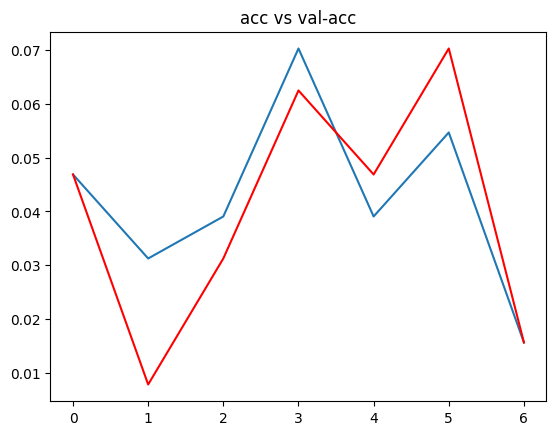

In [66]:
import matplotlib.pyplot as plt
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'], c="red")

plt.title("acc vs val-acc")
plt.show()

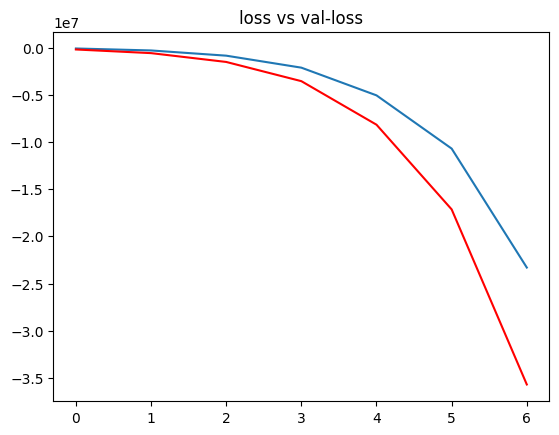

In [67]:
plt.plot(h["loss"])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs val-loss")
plt.show()

In [68]:
from keras.models import load_model
model = load_model("/content/bestmodel.h5")

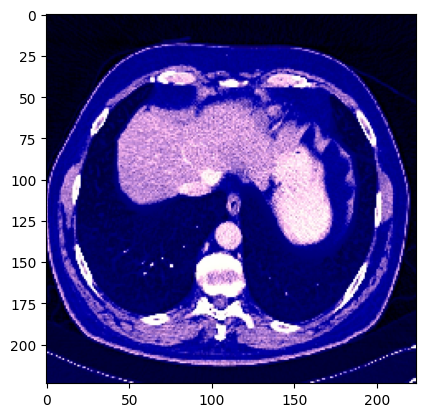

1/1 [==============================] - 0s 170ms/step
The MRI is not having a tumour


In [69]:
path = "/content/Liver tumour data/Liver tumour dataset/Liver Tumor/volume-11_slice_424.jpg"
img = load_img(path, target_size = (224,224))
input_arr = img_to_array(img)/255
plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr = np.expand_dims(input_arr,axis=0)
pred = model.predict(input_arr)[0][0]
pred

if pred == 0:
  print("The MRI is having a tumour")
if pred == 1:
  print("The MRI is not having a tumour")
